
# No-Show Appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. ‘ScheduledDay’ tells us on what day the patient set up their appointment. 
‘Neighborhood’ indicates the location of the hospital. 
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Reading the data here to view its general properties in order to know what is required to be done in cleaning the data. e.g: check if there're any missing values

### General Properties

In [39]:
NoShowAppoitnments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
NoShowAppoitnments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Get the size of this dataset!

In [40]:
NoShowAppoitnments.shape

(110527, 14)

### Get the statistics of the dataset!

In [41]:
NoShowAppoitnments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Get the information of each column in the dataset,check if there any missing data!

In [42]:
NoShowAppoitnments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### After checking the dataset , no missing value there. dataset is already clean

### Visualize the dataset

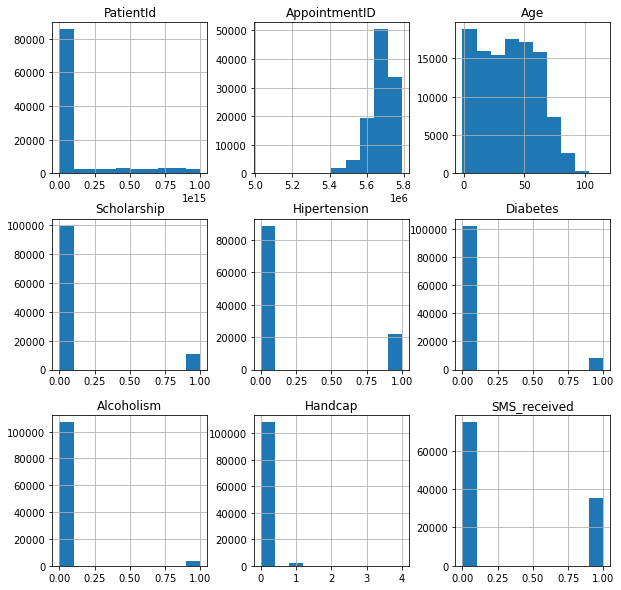

In [43]:
NoShowAppoitnments.hist(figsize=(10,10));



## Data Cleaning 

### Dropping the columns which is not important in my analysis

In [44]:

NoShowAppoitnments.drop(['PatientId', 'AppointmentID', 'ScheduledDay' , 'AppointmentDay'], axis = 1, inplace = True)
NoShowAppoitnments.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Does people who showed up received the sms?

In [46]:
showedUp= NoShowAppoitnments['No-show'] == 'No'
didntShowUp=NoShowAppoitnments['No-show'] == 'Yes'
NoShowAppoitnments.SMS_received[showedUp].mean()

0.2913341193542536

In [47]:
NoShowAppoitnments.SMS_received[didntShowUp].mean()

0.43837089475334917

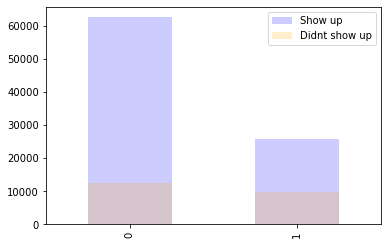

In [48]:
NoShowAppoitnments.SMS_received[showedUp].value_counts().plot(kind='bar',alpha=0.2, color= 'blue', label='Show up')
NoShowAppoitnments.SMS_received[didntShowUp].value_counts().plot(kind='bar',alpha=0.2, color= 'orange', label='Didnt show up')
plt.legend();

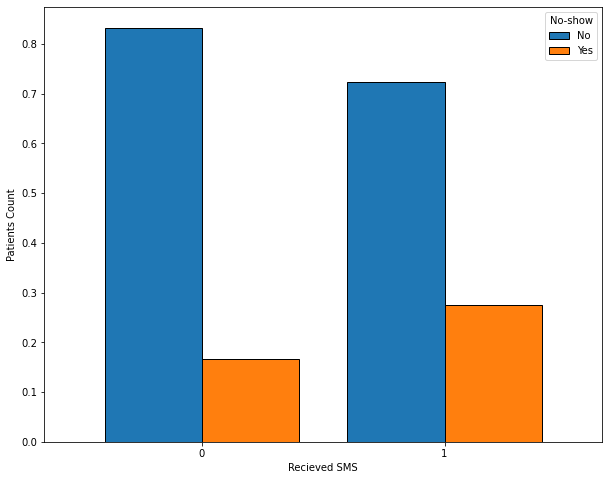

In [49]:
NoShowAppoitnments.groupby('SMS_received')['No-show'].value_counts(normalize=True).unstack().plot.bar(edgecolor='black', figsize=[10,8],rot=0,width=0.8);
#hist(alpha=0.3,label='showed up')
#NoShowAppoitnments.SMS_received[didntShowUp].hist(alpha=0.3, label='Didnt show up')
#plt.legend();
plt.xlabel('Recieved SMS');
plt.ylabel('Patients Count');

### People who send the SMS are more likely to show less for the appointment

### Does the age of the patient affects showing up? 

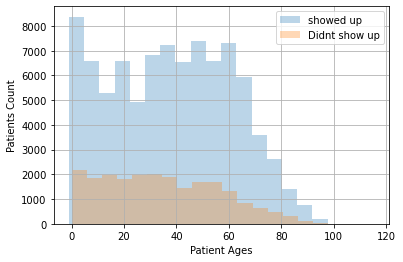

In [50]:
NoShowAppoitnments.Age[showedUp].hist(alpha=0.3, bins=20, label='showed up')
NoShowAppoitnments.Age[didntShowUp].hist(alpha=0.3, bins=20, label='Didnt show up')
plt.legend();
plt.xlabel('Patient Ages');
plt.ylabel('Patients Count');


### More adult Patients are more probably to show up in the appointment 

### Does the scholarship affects the showing up?

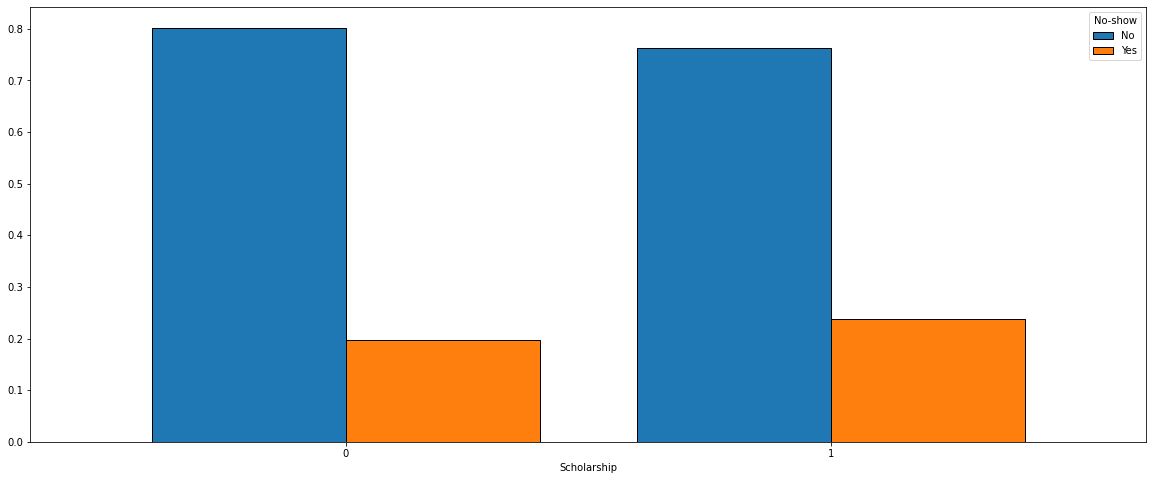

In [51]:
NoShowAppoitnments.groupby('Scholarship')['No-show'].value_counts(normalize=True).unstack().plot.bar(edgecolor='black', figsize=[20,8],rot=0,width=0.8);


### Its obvious that patients enrolled in Brasilian welfare program Bolsa Família show up less

### Do Patients with Hipertension show up?

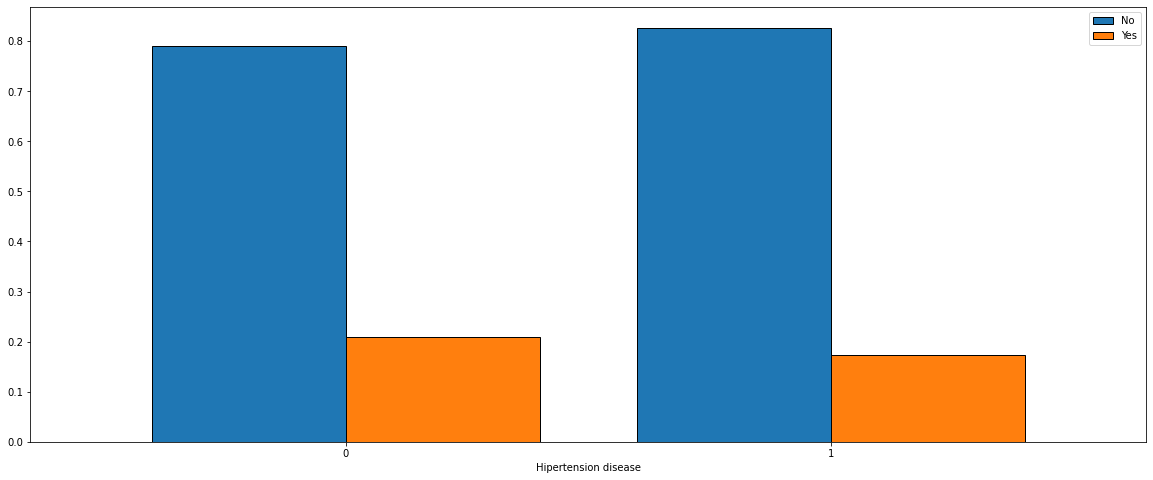

In [52]:
# NoShowAppoitnments.Hipertension[showedUp].hist(alpha=0.3, bins=20, label='showed up')
# NoShowAppoitnments.Hipertension[didntShowUp].hist(alpha=0.3, bins=20, label='Didnt show up')
NoShowAppoitnments.groupby('Hipertension')['No-show'].value_counts(normalize=True).unstack().plot.bar(edgecolor='black', figsize=[20,8],rot=0,width=0.8);

plt.legend();
plt.xlabel('Hipertension disease');


### Its clearly that Patients with hipertension show up more compared to other illness

### Is there's a correlation between showing up and the gender of the patient?

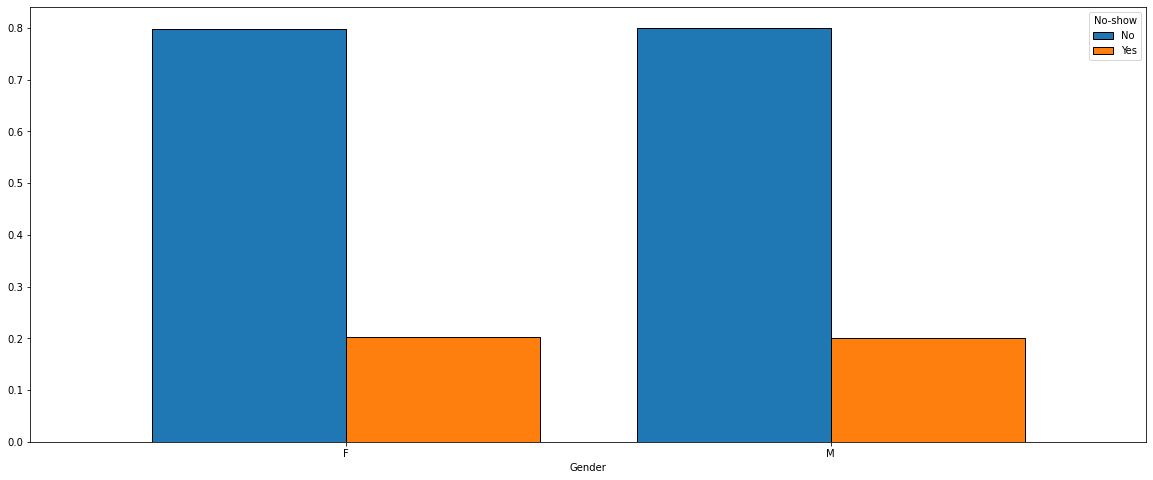

In [53]:
NoShowAppoitnments.groupby('Gender')['No-show'].value_counts(normalize=True).unstack().plot.bar(edgecolor='black', figsize=[20,8],rot=0,width=0.8);


### Its obvious that there's no correlation between the gender and showing up

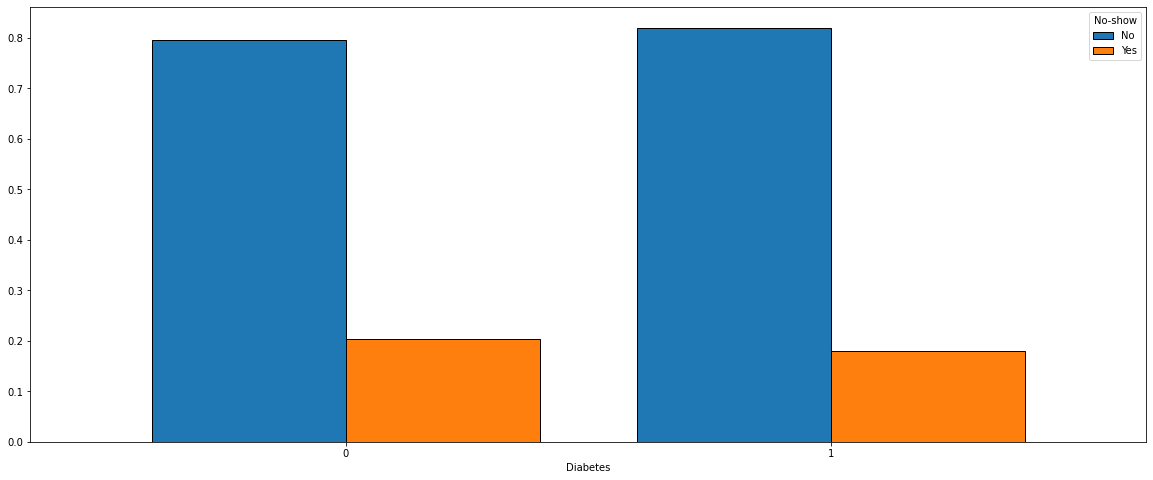

In [54]:
# NoShowAppoitnments.Diabetes[showedUp].hist(alpha=0.3, bins=20, label='showed up')
# NoShowAppoitnments.Diabetes[didntShowUp].hist(alpha=0.3, bins=20, label='Didnt show up')
# plt.legend();
# plt.xlabel('Diabetes Disease');
# plt.ylabel('Patients Count');
NoShowAppoitnments.groupby('Diabetes')['No-show'].value_counts(normalize=True).unstack().plot.bar(edgecolor='black', figsize=[20,8],rot=0,width=0.8);


### More people with diabete attend to show up

### Is there a correlation between alcoholism and showing up?

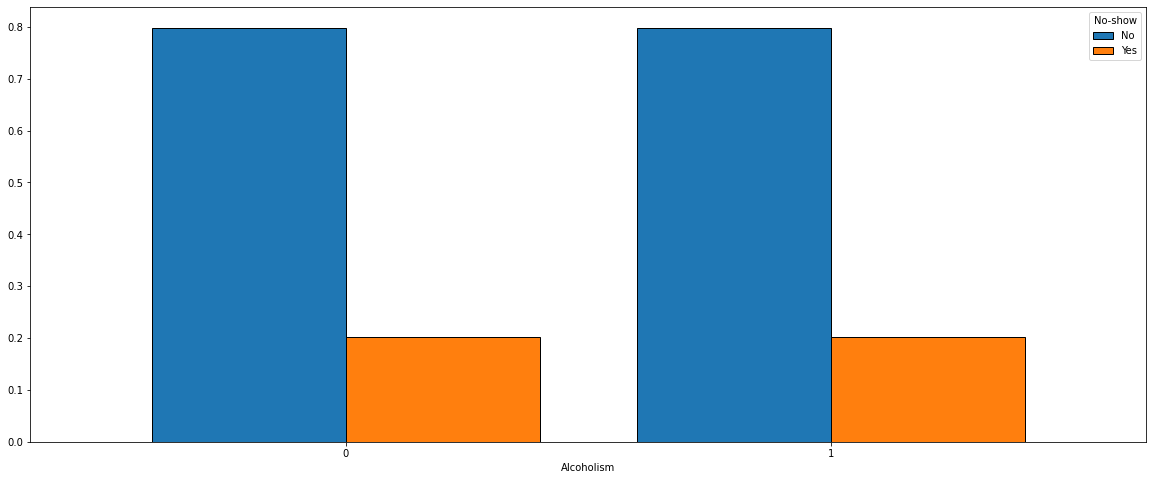

In [55]:
# NoShowAppoitnments.Alcoholism[showedUp].hist(alpha=0.3, bins=20, label='showed up')
# NoShowAppoitnments.Alcoholism[didntShowUp].hist(alpha=0.3, bins=20, label='Didnt show up')
# plt.legend();
# plt.xlabel('Alcoholism disease');
# plt.ylabel('Patients Count');
NoShowAppoitnments.groupby('Alcoholism')['No-show'].value_counts(normalize=True).unstack().plot.bar(edgecolor='black', figsize=[20,8],rot=0,width=0.8);


### It's almost 50-50 , no correlation between them!

<a id='conclusions'></a>
## Conclusions

> We can conclude that patients who received the SMS showed up for the appointments rather than those who didn't receive the SMS,
Also patients age affects the showing up, elder patients are more likely to show up than younger patients,
Patients who enrolled in Brasilian welfare program Bolsa Família also more likely to show up (Scholarship),
Patients with Hipertension show up!